<a href="https://colab.research.google.com/github/SoodSheetal/Time-Series-Analysis/blob/main/AR(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA COLLECTION

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 9.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
#python modules
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.regression.linear_model import OLS
import pandas_datareader as pdr
from sklearn import metrics

In [ ]:
shareName = 'BHARATFORG.BO'            #stock name.
period = '25y'                         #timeframe
ticker = yf.Ticker(shareName)
dataset = ticker.history(period=period) #dataset variable.
dataset.reset_index(inplace=True)       #removing the existing index
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date                               #explanation of code for datetime function in the dataset (#dataframe is the input dataframe
dataset['Date'] = pd.to_datetime(dataset['Date'])                                       #to_datetime is the function used to convert datetime string to datetime
dataset.set_index('Date', inplace=True)#setting date as the index

In [ ]:
df=dataset.copy()

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-02-02,4.698195,4.698195,4.698195,4.698195,721,0.0,0.0
1998-02-03,4.625914,4.640371,4.553635,4.575319,77794,0.0,0.0
1998-02-04,4.625915,4.625915,4.481355,4.488584,159383,0.0,0.0
1998-02-05,4.358479,4.553635,4.358479,4.539179,9280,0.0,0.0
1998-02-06,4.409076,4.553635,4.401847,4.488584,11858,0.0,0.0


In [ ]:
#reseting index
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1998-02-02,4.698195,4.698195,4.698195,4.698195,721,0.0,0.0
1,1998-02-03,4.625914,4.640371,4.553635,4.575319,77794,0.0,0.0
2,1998-02-04,4.625915,4.625915,4.481355,4.488584,159383,0.0,0.0
3,1998-02-05,4.358479,4.553635,4.358479,4.539179,9280,0.0,0.0
4,1998-02-06,4.409076,4.553635,4.401847,4.488584,11858,0.0,0.0


In [ ]:
df=df[['Date','Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close  Volume
0    1998-02-02    4.698195    4.698195    4.698195    4.698195     721
1    1998-02-03    4.625914    4.640371    4.553635    4.575319   77794
2    1998-02-04    4.625915    4.625915    4.481355    4.488584  159383
3    1998-02-05    4.358479    4.553635    4.358479    4.539179    9280
4    1998-02-06    4.409076    4.553635    4.401847    4.488584   11858
...         ...         ...         ...         ...         ...     ...
6266 2023-01-27  869.950012  872.700012  839.950012  854.599976   34045
6267 2023-01-30  850.150024  869.599976  850.150024  865.599976   14906
6268 2023-01-31  867.000000  884.000000  864.700012  875.200012   28670
6269 2023-02-01  886.950012  903.700012  845.000000  866.849976   76242
6270 2023-02-02  855.049988  884.200012  855.049988  875.099976   16334

[6271 rows x 6 columns]>

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,6271.000000,6271.000000,6271.000000,6271.000000,6.271000e+03
mean,237.680693,241.357178,233.331669,237.115320,2.667601e+05
std,238.429254,241.703228,234.609037,237.960622,5.162624e+05
min,3.324876,3.361016,0.004690,3.335718,0.000000e+00
25%,42.426006,43.602004,40.667250,42.444120,5.772350e+04
50%,134.928804,137.181913,132.528266,134.580780,1.221580e+05
75%,432.970049,439.553573,425.014813,431.543961,2.640945e+05
max,912.950012,919.500000,892.599976,908.849976,1.707567e+07


Text(0.5, 1.0, 'Close Price')

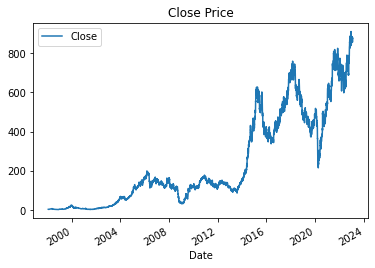

In [ ]:
#data plot
#exponential increase

df.plot(x='Date', y='Close')

plt.title("Close Price")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

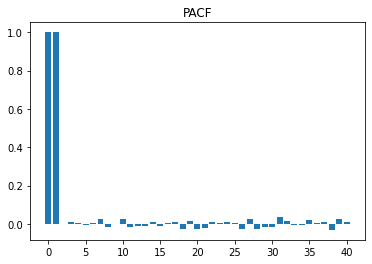

In [ ]:
#partial correlation function
# Plot PACF---signifance of lags after lag 1 so it suggests our AR or ARMA model.
from statsmodels.tsa.stattools import acf, pacf
plt.bar(x=np.arange(0,41), height=pacf(df.Close))
plt.title("PACF")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


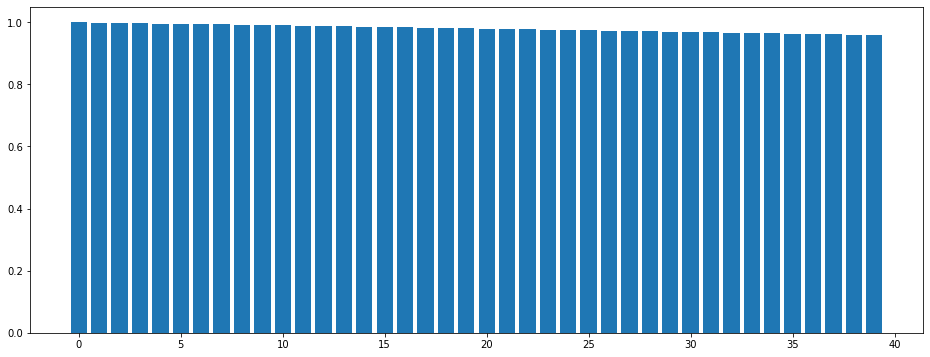

In [ ]:
#AUTOCORRELATION
#plotting the autocorrelation function, we get a slightly different result. The series is infinite and slowly damps out, which suggests an AR or ARMA model
from statsmodels.tsa.stattools import acf, pacf
plt_1 = plt.figure(figsize=(16, 6))
ACF=acf(df['Close'])
show=plt.bar(np.arange(0,40),ACF[0:40])

#plt.plot(ACF)

In [ ]:
#checking stationary
from statsmodels.tsa.stattools import adfuller
result =adfuller(df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.355258
p-value: 0.979742


In [ ]:
# Make it stationary by differencing
stock = df.Close.diff().fillna(0)
# Create lag
stock_lag_1 = stock.shift(1).fillna(0)

In [ ]:
#checking stationary
from statsmodels.tsa.stattools import adfuller
result =adfuller(stock)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])



ADF Statistic: -14.762155
p-value: 0.000000


Text(0.5, 1.0, 'Stock Returns')

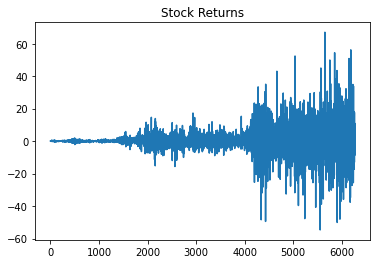

In [ ]:
stock.plot(x='Date', y='Close')
plt.title("Stock Returns")

In [ ]:
# Put all into one DataFrame

df_regression = pd.DataFrame(stock)
df_regression["Lag1"] = stock_lag_1

# Split into train and test data
df_regression_train = df_regression.iloc[0:400]
df_regression_test = df_regression.iloc[400:]

In [ ]:
df_regression.describe()

,Close,Lag1
count,6271.000000,6271.000000
mean,0.138798,0.137482
std,7.104850,7.104112
min,-54.677582,-54.677582
25%,-1.515213,-1.515213
50%,-0.010842,-0.010842
75%,1.630180,1.624969
max,67.041565,67.041565


Run rolling regression for optimal window

In [ ]:
# expanding past observations by 1 each time
n = 0
rsquared = [] #goodness-of-fit

while n<=30: #window size 30

    y = df_regression_train["Close"].iloc[-n:]
    x = df_regression_train["Lag1"].iloc[-n:]
    x = sm.add_constant(x)

    model = sm.OLS(y,x)
    results = model.fit()

    rsquared.append(results.rsquared)

    n +=1

rsquared

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[0.014102014444313693,
 nan,
 1.0,
 0.03881533880789301,
 0.010950585488811893,
 0.17635350613289225,
 0.08772332212076706,
 0.10011692412780726,
 0.09110811670447183,
 0.08813337783943587,
 0.11545723277288256,
 0.0009177076682459484,
 0.013565679056419144,
 0.01187655315419689,
 0.012742174187317934,
 0.029475333590315955,
 0.02065170285327167,
 0.017869508907490617,
 0.012139520398423254,
 0.01084791677644159,
 0.010567607118237898,
 0.02405440772943701,
 0.003815063620808412,
 0.0007287122159123083,
 0.00016561512326251915,
 0.0009320962129080179,
 0.0001733188529414731,
 0.0008781733999211339,
 0.0008467284926214624,
 0.0008293459563960548,
 0.00046261437229300206]

Text(0.5, 0, 'Observation')

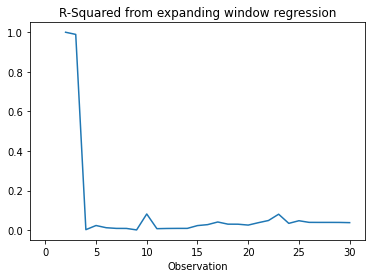

In [ ]:
plt.plot(rsquared) #model has 31% variation in the data

#rsquared.index(0.31100489979797086)
plt.title("R-Squared from expanding window regression")
plt.xlabel("Observation")

AR(1) with static coefficient - training data

In [ ]:
#ar(1) with static coefficient - training data
y = df_regression_train["Close"].iloc[-13:]
x = df_regression_train["Lag1"].iloc[-13:]
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.1322
Date:                Thu, 02 Feb 2023   Prob (F-statistic):              0.723
Time:                        06:14:08   Log-Likelihood:                -6.7350
No. Observations:                  13   AIC:                             17.47
Df Residuals:                      11   BIC:                             18.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1559      0.132      1.181      0.2

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


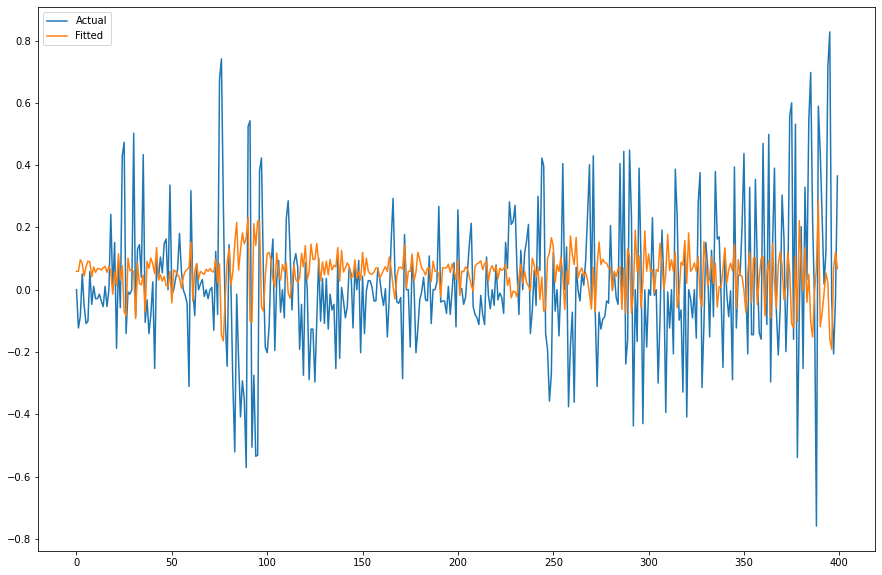

In [ ]:
#fitting ar to training data
fitted = 0.0589 + -0.3020*df_regression_train["Lag1"]

ax = plt.figure(figsize=(15,10))
plt.plot(df_regression_train["Close"])
plt.plot(fitted)
plt.legend(["Actual","Fitted"])

In [ ]:
# Combine into one DataFrame
df_2 = pd.DataFrame({"FittedValue":fitted,
                        "Actual":df_regression_train["Close"]})

In [ ]:
df_2.head()

,FittedValue,Actual
0,0.058900,0.000000
1,0.058900,-0.122876
2,0.096008,-0.086735
3,0.085094,0.050596
4,0.043620,-0.050596


In [ ]:
# Calculate residuals
df_2["Residuals"] = df_2["FittedValue"] - df_2["Actual"]

Text(0.5, 1.0, 'Residuals')

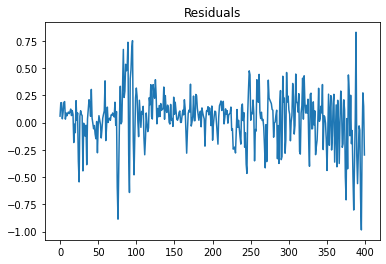

In [ ]:
df_2.Residuals.plot()
plt.title("Residuals")

In [ ]:
# calculating hit rate
true_neg = np.sum((df_2["FittedValue"] <0) & (df_2["Actual"] <0))

In [ ]:
true_pos = np.sum((df_2["FittedValue"] >0) & (df_2["Actual"] >0))

In [ ]:
accuracy = (true_neg + true_pos)/len(df_2)
accuracy #-41%

0.4125

AR to test data

Text(0.5, 1.0, 'Actual vs Fitted - Test Data')

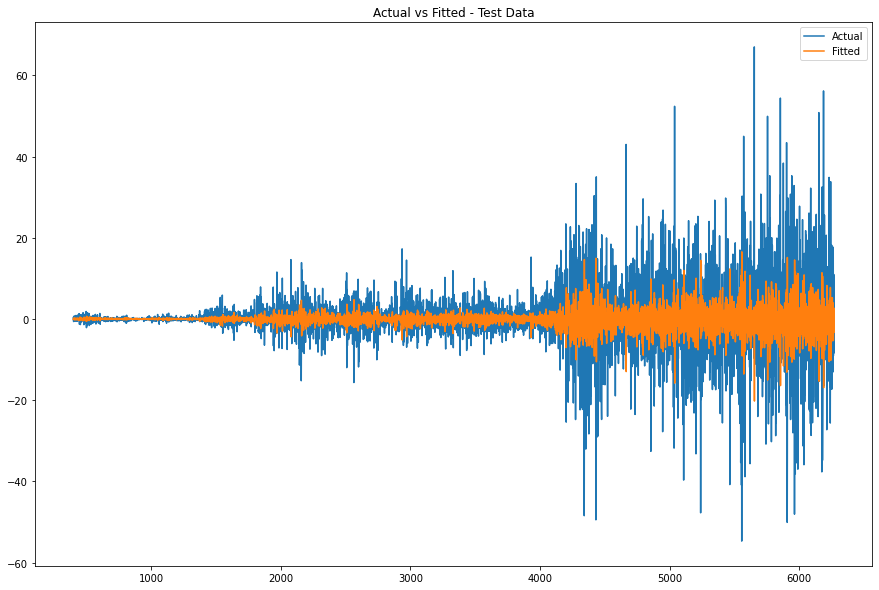

In [ ]:
#ar to test data
fitted_test = 0.0589 + -0.3020*df_regression_test["Lag1"]
ax = plt.figure(figsize=(15,10))

plt.plot(df_regression_test["Close"])
plt.plot(fitted_test)
plt.legend(["Actual","Fitted"])
plt.title("Actual vs Fitted - Test Data")

In [ ]:
# Combine into one DataFrame
df_2_test = pd.DataFrame({"FittedValue":fitted_test,
                        "Actual":df_regression_test["Close"]})

Text(0.5, 1.0, 'Residuals - Test Data')

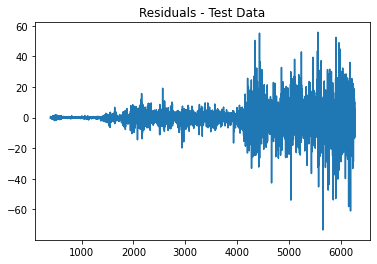

In [ ]:
# Calculate residuals
df_2_test["Residuals"] = df_2_test["FittedValue"] - df_2_test["Actual"]
df_2_test["Residuals"].plot()
plt.title("Residuals - Test Data")

In [ ]:
#hit rate test data
true_neg_test = np.sum((df_2_test["FittedValue"] <0) & (df_2_test["Actual"] <0))
true_pos_test = np.sum((df_2_test["FittedValue"] >0) & (df_2_test["Actual"] >0))

accuracy = (true_neg_test + true_pos_test)/len(df_2_test)
accuracy

0.49327201498892864

In [ ]:
print(metrics.mean_squared_error(df_2.Actual,df_2.FittedValue))

0.05717622466020027


In [ ]:
print(metrics.r2_score(df_2.Actual,df_2.FittedValue))

-0.18858747712069612


In [ ]:
metrics.mean_absolute_error(df_2.Actual,df_2.FittedValue)

0.17560357808351518

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(df_2.Actual,df_2.FittedValue))

0.23911550485110802